In [3]:
import numpy as np
from matplotlib import pyplot as plt
import timeit

## Distribution Test Site
It is tried to find a discrete distribution given its mean and variance Due to theoretical reasoning, and maximizing entropy under constrains, the functional form of the distribution $p(m)$ for $m \in \mathbb{Z}$ is:

$$
p_m = \frac{1}{Z}e^{-\alpha(m - \mu)^2} \quad\text{for}\quad m \in \mathbb{Z}
$$

It's variance-threshold is $p_c (1-p_c)$, where $p_c$ are the decimal places of the mean. Lower variances are not possible and it is thus resorted to Lawrence' distribution.

In [261]:
phase_space = np.arange(-20, 20)
# prob = np.array([0.2, 0.3, ......]) shape = phase_space.shape

In [384]:
def calc_prob(phase_space, my, alpha):
    alpha = np.abs(alpha)
    decimals = my - np.floor(my)

    if alpha <= 0.3: # lawrence dist for too small variances
        low = np.where(phase_space == np.floor(my))[0][0]
        pre = np.zeros(phase_space.shape)
        pre[low] = 1 - decimals
        pre[low + 1] = decimals

        return pre
    
    pre = np.exp(-(phase_space - my)**2 / alpha)
    
    Z = np.sum(pre, axis = 0)
    return pre / Z

In [385]:
def get_param(target_mean, target_var):
    target_mean = np.array(target_mean, dtype="float")
    target_var = np.array(target_var, dtype="float")
    decimals = target_mean - np.floor(target_mean)

    # initial conditions
    dt = 1
    my = np.copy(target_mean)
    alpha = np.copy(target_var)

    opt_alpha = target_var > decimals * (1 - decimals)
    if not opt_alpha:
        alpha = 0

    for i in range(10):
        probs = calc_prob(phase_space, my, alpha)
        mean = np.sum(phase_space * probs)
        var = np.sum(phase_space**2 * probs) - mean**2

        delta_mean = target_mean - mean
        delta_var = target_var - var

        my += dt * delta_mean
        if opt_alpha:
            alpha += dt * delta_var

    return my, alpha

In [401]:
# result
my, alpha = get_param(2.345678, 0.233)
probs = calc_prob(phase_space, my, alpha)
print("mean:", np.sum(phase_space * probs))
print("var:",  np.sum(phase_space**2 * probs) - np.sum(phase_space * probs)**2)

mean: 2.260918004276306
0.3011527968400032
var: 0.19842648298633225


<BarContainer object of 40 artists>

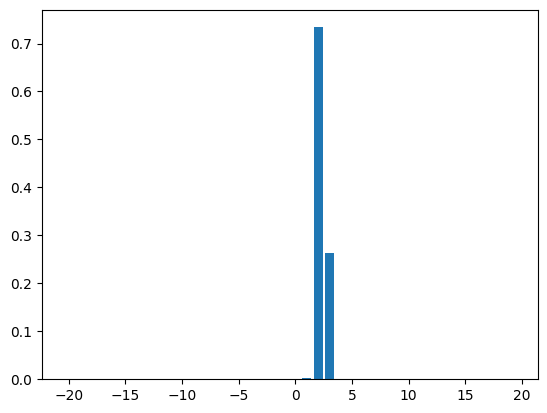

In [402]:
plt.bar(phase_space, probs)